In [2]:
import numpy as np
import matplotlib.pyplot as plt


### Least Square Method using Normal Equation Solution
### 正規方程式を用いて最小二乗法を行う

適当にランダムで線形データにノイズが乗ったようなものを作成する

In [3]:
X = 2 * np.random.rand(100, 1) #  Randomize with a Uniform Distribution 
y  = 4 + 3 *X + np.random.randn(100, 1) # Randomize with a Normalized Distribution, Y = 4 + 3X + Noise

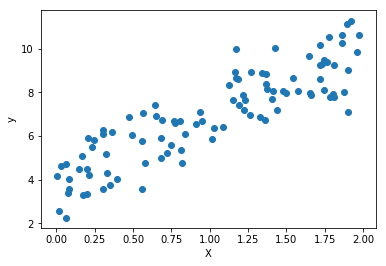

In [4]:
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [5]:
X_b = np.c_[np.ones((100, 1)), X] # Add 1 to heads of each row of X. This is constant term which equivalent to b of y= ax + b
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[3.93474805]
 [2.98880109]]


真値は4, 3なのでまあまあ近い。<br>
次に、予測結果をplotしてみる。

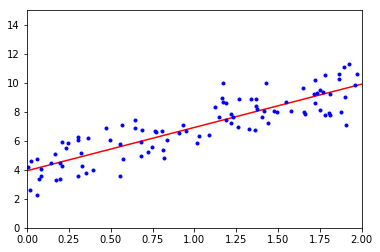

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0,2, 0, 15])
plt.show()

いい感じに回帰できてる<br>
いま自分でコードを書いたけど、scikit-learnなら次のようになる

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y) # fit method returns Bias Param to ingercept_ member variable, and other Weights to coef_ member variable
print(lin_reg.intercept_, lin_reg.coef_)

[3.93474805] [[2.98880109]]


/Users/yossy/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


手で書いたやつと同じ結果になった。<br>
予測をするならこちら、先ほどのグラフの赤線の左端と右端になるはず。

In [8]:
print(lin_reg.predict(X_new))

[[3.93474805]
 [9.91235023]]



正規方程式の特徴：<br>
① 特徴量の数nに対して$O(n^2)$<br>
② サンプルデータ数mに対して$O(m)$<br>
→ 特徴量やサンプル数が非常に多い場合は正規方程式は向かない、その場合は勾配法を使う


### Gradient Descent
### 勾配法

Deep Learningでも使ってる方法<br>
線形回帰に最小二乗誤差（Mean Square Error, MSE）を適用する時凸関数であることが保証されている→ 学習率が十分小さく長い時間計算して良いなら必ず大域的最適解に収束する

Batch Gradient Descent<br>
バッチ勾配降下法 データ全部使う

In [9]:
eta = 0.1 # Learning Rate
n_iterations = 1000
m = 100 # Number of Samples 

theta = np.random.randn(2,1) # Initialize Parameters with a Normal Distribution

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # This gradient is from MSE definition
    theta = theta - eta * gradients

print(theta)

[[3.93474805]
 [2.98880109]]


正規方程式で見つけた最適解と一致した→ 勾配法が正しく機能した

Stocastic Gradient Descent (SGD)<br>
確率的勾配降下法<br>

データがめちゃくちゃ多くなると全部のデータ見てパラメータ更新するのは時間がかかりすぎる。そこでサンプル一つにつき更新を行う。<br>
サンプル一つずつ重みを更新するため、全体のコスト関数は上下を繰り返す。BGDなら必ず下がったが。。。<br>
そうすると最適値付近でも値が暴れるので、学習率を少しずつ下げたりしたい。（学習スケジュール）

In [10]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m) # random int number within 0 ~ m
        xi = X_b[random_index: random_index+1]
        yi = y[random_index: random_index + 1]
        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta*gradients


print(theta)

[[3.88474779]
 [3.01032685]]


結構ぶれてるけど近い<br>
これも同様にscikit-learnで書いてみると

In [11]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1) # penalty is a parameter for regulatization, and the learning schedule is default one
sgd_reg.fit(X, y.ravel()) # ravel is a method like flatten
print(sgd_reg.intercept_, sgd_reg.coef_)

[3.91720872] [2.97599214]


/Users/yossy/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


ミニバッチ勾配降下法もscikit-learnにはある。BGDとSGDの中間。

### Polynomial Regression
### 多項式回帰

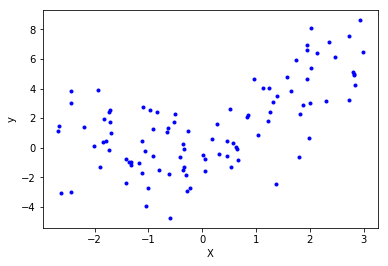

In [12]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2*np.random.randn(m,1)

plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False) # Choose degree of polynomial
X_poly = poly_features.fit_transform(X)
print(X[0]) # Data
print(X_poly[0]) # Calculated Polynomial Feature

[2.72574006]
[2.72574006 7.42965887]


生データXに対して高次の特徴量X_polyが計算されている<br>
回帰の計算方法は特徴量が増えても変わらないので、後のコードは線形回帰の時と同じ

In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

[0.11303165] [[0.8851429  0.49467661]]


真値はそれぞれ[0, 1, 0.5]なのでまあこんなもんかという感じ<br>
過学習させるのが簡単なのでやってみる

In [15]:
poly_features_over = PolynomialFeatures(degree = 30, include_bias = False) # Choose degree of polynomial
X_poly_over = poly_features_over.fit_transform(X)
lin_reg_over = LinearRegression()
lin_reg_over.fit(X_poly_over, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

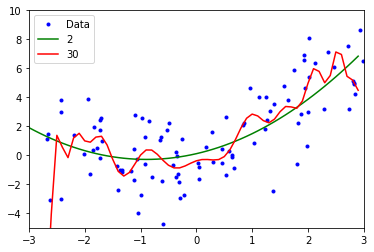

In [16]:
X_new = np.reshape(np.arange(-3, 3, 0.1), [60, 1])
y_predict = lin_reg.predict(poly_features.fit_transform(X_new))
y_predict_over = lin_reg_over.predict(poly_features_over.fit_transform(X_new))
plt.plot(X, y, 'b.')
plt.plot(X_new, y_predict, 'g')
plt.plot(X_new, y_predict_over, 'r')
plt.ylim([-5, 10])
plt.xlim([-3, 3])
plt.legend(('Data', '2', '30'))
plt.show()

さすがに30次の多項式では過学習してる

一般に過学習をどうやって判断するか？<br>
→ 与えるデータが増えた時にほとんど成績に変化がなければ、過小適合<br>
→ Training set と Validation setのさが大きければ過学習

ここでデータを増やした時にどれだけLossが下がるか見る関数を定義

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), 'r', label='train')
    plt.plot(np.sqrt(val_errors), 'b', label='val')
    plt.legend(('train', 'val'))
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    plt.ylim([0, 4])
    

これを使ってとりあえず線形回帰で確認してみる

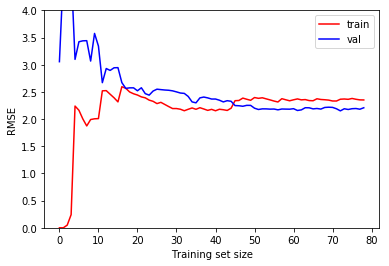

In [18]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

いつもみている学習曲線とは違うので注意。これは横軸がデータのサイズである。Deep Learning系は計算が重いので、この方法は使わないのだと思われる。<br>
しかし、パラメータが少ない対象への機械学習ならこの方法が有効と考える。<br>
この例ではデータ量が増加してもLossは下がらず、またTrainとValidationの差が無い。従って、過小適合していると考えられる。


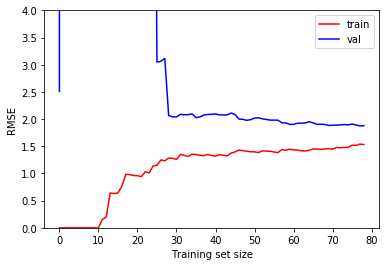

In [193]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias = False)), 
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

データサイズが大きくなるとtrainとvalの差がなくなっている→ 汎化性能が向上している→ データを増やせば性能が上がる

### Ridge Regression
### リッジ回帰

回帰する関数の形が特殊でわけはなく、Lossに正則化項を加えていることが特徴。線形回帰＋正則化。コスト関数を$J(\theta)$として<br>
$J(\theta) = MSE(\theta) + \alpha \frac{1}{2} \Sigma_{i=1}^n{\theta_i^2}$<br>
正則化項は特徴量のスケールの影響を強く受けるので使う時は必ずスケーリングをしておくこと・

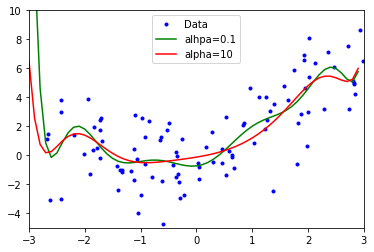

In [102]:
from sklearn.linear_model import Ridge
poly_features_over = PolynomialFeatures(degree = 10, include_bias = False) # Choose degree of polynomial
X_over = poly_features_over.fit_transform(X)

alpha_array = [1e-1, 10]
y_predict_over = np.zeros((len(alpha_array), len(X_new), 1))
for i, alph in enumerate(alpha_array):
    ridge_reg = Ridge(alpha=alph, solver = 'cholesky') # Solve Ridge regression with closed form
    ridge_reg.fit(X_over, y)
    y_predict_over[i] = ridge_reg.predict(poly_features_over.fit_transform(X_new))

plt.plot(X, y, 'b.')
plt.plot(X_new, y_predict_over[0], 'g')
plt.plot(X_new, y_predict_over[1], 'r')
plt.ylim([-5, 10])
plt.xlim([-3, 3])
plt.legend(('Data', 'alhpa='+str(alpha_array[0]), 'alpha='+str(alpha_array[1])))
plt.show()

10次の回帰も滑らかになっていい感じ

### Lasso Regression


正則化項が2乗でなく $l1$ノルム（この場合絶対値）<br>
$J(\theta) = MSE(\theta) + \alpha\Sigma_{i=1}^n{|\theta_i|}$<br>
Ridge回帰と比較するとあまり寄与しない特徴量の係数がほぼ0になるように訓練される（係数が疎になる）特徴がある

/Users/yossy/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


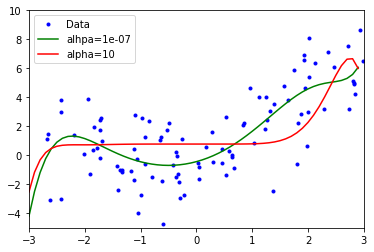

In [104]:
from sklearn.linear_model import Lasso
poly_features_over = PolynomialFeatures(degree = 10, include_bias = False) # Choose degree of polynomial
X_over = poly_features_over.fit_transform(X)

alpha_array = [1e-7, 10]
y_predict_over = np.zeros((len(alpha_array), len(X_new)))
for i, alph in enumerate(alpha_array):
    ridge_reg = Lasso(alpha=alph) # Solve Ridge regression with closed form
    ridge_reg.fit(X_over, y)
    y_predict_over[i] = ridge_reg.predict(poly_features_over.fit_transform(X_new))

plt.plot(X, y, 'b.')
plt.plot(X_new, y_predict_over[0], 'g')
plt.plot(X_new, y_predict_over[1], 'r')
plt.ylim([-5, 10])
plt.xlim([-3, 3])
plt.legend(('Data', 'alhpa='+str(alpha_array[0]), 'alpha='+str(alpha_array[1])))
plt.show()

たしかにRidgeの$\alpha=10$とLassoの$\alpha=1e-7$を比べても、Lassoの方が高次の項消えてる感じがする

### Elastic Net

Ridge回帰とLasso回帰の混ぜ合わせ、パラメータを調節できる。<br>
$J(\theta) = MSE(\theta) + r\alpha\Sigma_{i=1}^n{|\theta_i|} + \alpha \frac{1-r}{2} \Sigma_{i=1}^n{\theta_i^2}$

/Users/yossy/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


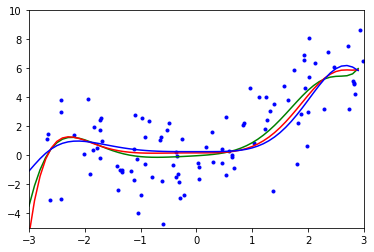

In [107]:
from sklearn.linear_model import ElasticNet

from sklearn.linear_model import Ridge
poly_features_over = PolynomialFeatures(degree = 10, include_bias = False) # Choose degree of polynomial
X_over = poly_features_over.fit_transform(X)

alph = 1
l1_ratio_array = [0, 0.5, 1]
y_predict_over = np.zeros((len(l1_ratio_array), len(X_new)))
for i, l1_ratio in enumerate(l1_ratio_array):
    elastic_net = ElasticNet(alpha=alph, l1_ratio = l1_ratio) # Solve Ridge regression with closed form
    elastic_net.fit(X_over, y)
    y_predict_over[i] = elastic_net.predict(poly_features_over.fit_transform(X_new))

plt.plot(X, y, 'b.')
plt.plot(X_new, y_predict_over[0], 'g')
plt.plot(X_new, y_predict_over[1], 'r')
plt.plot(X_new, y_predict_over[2], 'b')
plt.ylim([-5, 10])
plt.xlim([-3, 3])
# plt.legend(('Data', 'r='+str(l1_ratio_array[0]), 'r='+str(l1_ratio_array[1]), 'r='+str(l1_ratio_array[2])))
plt.show()

↑　なんだかうまく動いてない感じがするが....<br>
正則化について、デフォはRidge。データの前提条件として、意味のある特徴量は少ないなど（スパースなモデルが欲しい時とか）あればLasso。<br>
しかし特徴量が多い時Lassoは変な挙動をすることがあるので一般的にはLassoを使うならElasticNetが良い。

### Logistic Regression
### ロジスティック回帰

$\sigma(t) = \frac{1}{1  + exp(-t)}$<br>
$J(\theta) = -\frac{1}{m}\Sigma_{i=1}^{m}[y^{(i)}log(p^{(i)}) + (1 - y^{(i)}) log(1-p^{(i)})]$

正規方程式みたいに閉形式で最適解はでないけど凸関数であることはわかっているので勾配法で解く<br>
分類器を作りたいのでIrisデータセットで試す

<img src="https://image.slidesharecdn.com/s06t1python4-151110035703-lva1-app6891/95/s06-t1-python4-28-638.jpg?cb=1447127885">

ロジスティック回帰は1クラスの分類器なので適当にirisのうちでVirginica種を見つけることを目標にする

['data', 'target', 'target_names', 'DESCR', 'feature_names']
(200, 500, 1, 1)


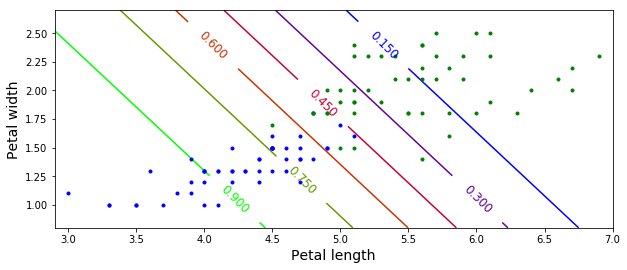

In [26]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression


iris = datasets.load_iris() # load iris dataset


print(list(iris.keys()))
X_all = iris["data"]
y = (iris["target"] == 2).astype(np.int) # Virginica

log_reg = LogisticRegression()
log_reg.fit(X_all, y)

X = iris["data"][:,2:]

x0, x1, x2, x3 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
        3.4,
        1.5,
    )
X_new = np.c_[x0.ravel(), x1.ravel(), x2.ravel(), x3.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "b.")
plt.plot(X[y==1, 0], X[y==1, 1], "g.")

zz = y_proba[:, 1].reshape(x0.shape)
print(x1.shape)
contour = plt.contour(x0[:,:,0,0], x1[:,:,0,0], zz[:,:,0,0], cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

4つの特徴量のうちの2次元断面<br>


### まとめ<br>
深層学習以外の機械学習案件も多いので基本を見直してみました<br>
Lassoとかあんまり考えたことなかったけどちゃんと使い分けとか特徴があるのでそこを理解した上で適切な手法を選択したい。<br>
sklearnの関数はオプションのところで思わぬデフォ値になってたりするので注意しよう